In [18]:
# 사용할 패키지.
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
# 사용할 데이터셋 준비.
!wget https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip
!mkdir default
!unzip default+of+credit+card+clients.zip -d default

!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
!mkdir bank
!unzip bank+marketing.zip -d bank
!unzip bank/bank.zip -d bank

!wget https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!mkdir wine
!unzip wine+quality.zip -d wine

In [6]:
# 데이터셋 불러오기.

# header=1 : Excel파일에서 2번째 행(인덱스 1)을 컬럼명으로 사용 (첫 번째(0번) 행을 건너뜀)
default = pd.read_excel(os.path.join('default', 'default of credit card clients.xls'), header=1)
bank = pd.read_csv(os.path.join('bank', 'bank-full.csv'), sep=';')
redwine = pd.read_csv(os.path.join('wine', 'winequality-red.csv'), sep=';')
house = pd.read_csv(os.path.join('sample_data', 'california_housing_train.csv'))
'''
기존 컬럼명 'default payment next month' 를 'DEFAULT'로 변경.
axis=1 : 1은 열(column) 기준으로 이름을 바꾸겠다는 의미. (만약 axis=0이면 행(index) 기준으로 이름 변경)
inplace=True : 원본 데이터프레임 default 자체를 수정. (False이면 새 데이터프레임을 반환해야 하고, 원본은 그대로)
'''
default.rename({'default payment next month': 'DEFAULT'}, axis=1, inplace=True)

↓ 막대그래프(Bar Graph)

In [7]:
# 변수 유형 파악하기.

def count_value(df):
    for column in df.columns:
        # 해당 컬럼(df[column])에서 고유한 값(unique values)의 개수를 반환.
        print(f'{column}: {df[column].nunique()}')
count_value(bank)

age: 77
job: 12
marital: 3
education: 4
default: 2
balance: 7168
housing: 2
loan: 2
contact: 3
day: 31
month: 12
duration: 1573
campaign: 48
pdays: 559
previous: 41
poutcome: 4
y: 2


In [13]:
# 변수별 빈도.

print(bank['job'])
print('=====================')
print(bank['job'].value_counts())
print('=====================')
job_count = bank['job'].value_counts().sort_index()
print(job_count)

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: count, dtype: int64


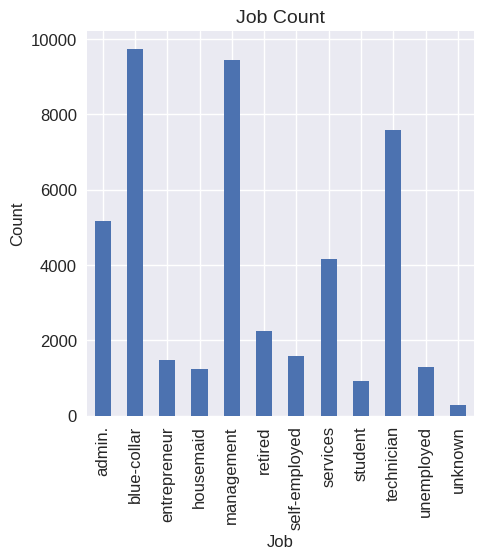

In [20]:
# 막대 그래프 그리기.

# plt : matplotlib의 pyplot 모듈.
plt.style.use('seaborn-v0_8')
# fig : Figure 객체, ax : Axes 객체(axis의 복수형)
fig, ax = plt.subplots(figsize=(5, 5))
job_count.plot(kind='bar', fontsize=12)
ax.set_xlabel('Job', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Job Count', fontsize=14)
plt.show()

<Axes: >

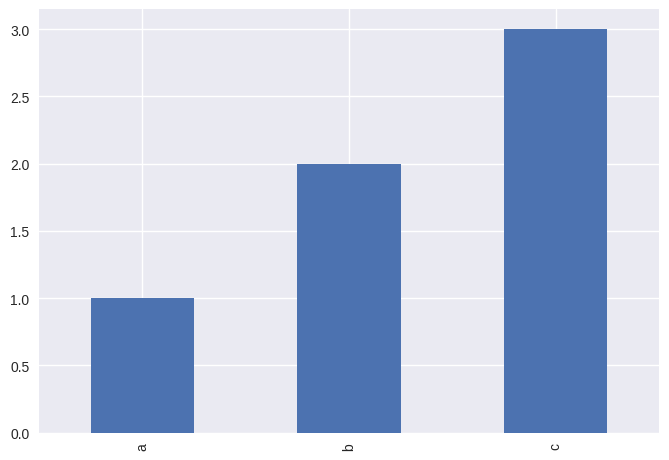

In [23]:
# Series 객체로 막대그래프 그리기.

#                 value             index
test = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
test.plot(kind='bar')

↓ 히스토그램(Histogram)

<Axes: >

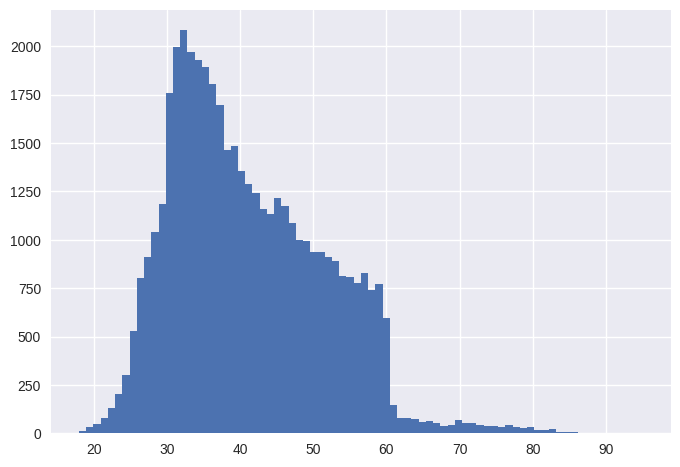

In [24]:
bins = int(bank['age'].max() - bank['age'].min() + 1)
# .hist() : 히스토그램(histogram)을 간단하게 그려주는 함수.
# bins : 구간의 개수(막대 개수)를 뜻함.
bank['age'].hist(bins=bins)

<Axes: >

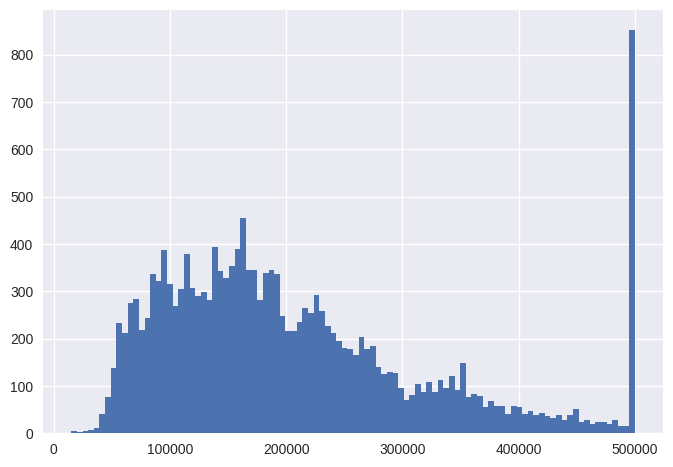

In [25]:
house['median_house_value'].hist(bins=100)

<Axes: >

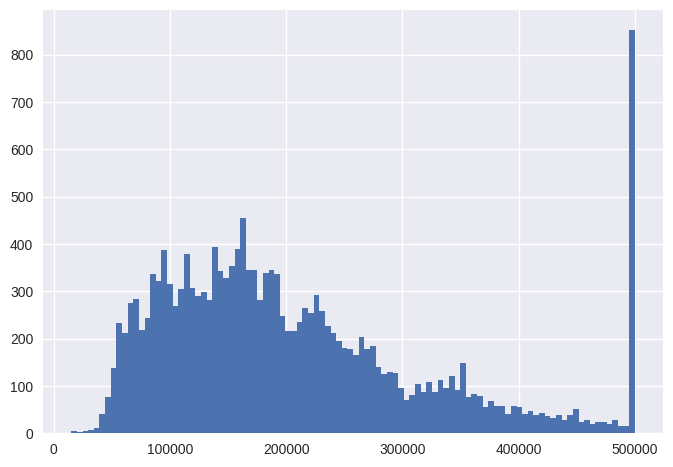

In [26]:
house['median_house_value'].hist(bins=100)

# 구간의 수를 100으로 설정.
# 하단 그래프를 보면 500,000 이상인 값들은 모두 500,000 값을 가지도록 전처리했음을 알 수 있음.

array([[<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'households'}>]], dtype=object)

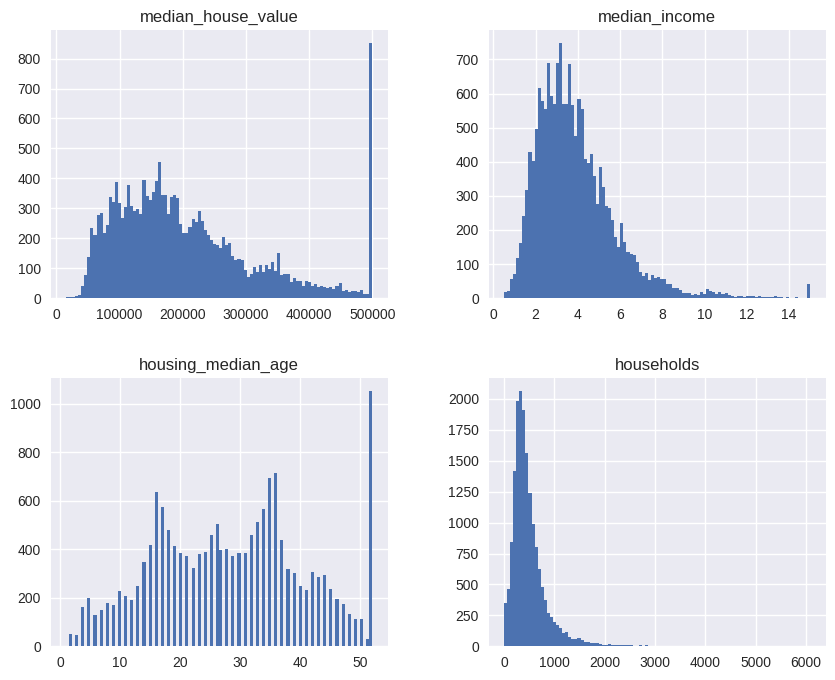

In [29]:
house[['median_house_value',
       'median_income',
       'housing_median_age',
       'households']].hist(bins=100, figsize=(10, 8))

# 데이터프레임에서 열들의 이름을 list로 해서 선택 => 이 4개의 열을 가지는 데이터프레임이 선택됨.
# 이에 대해서 .hist()를 호출하게 되면 각각의 열에 대해서 히스토그램을 그리게됨,

<Axes: >

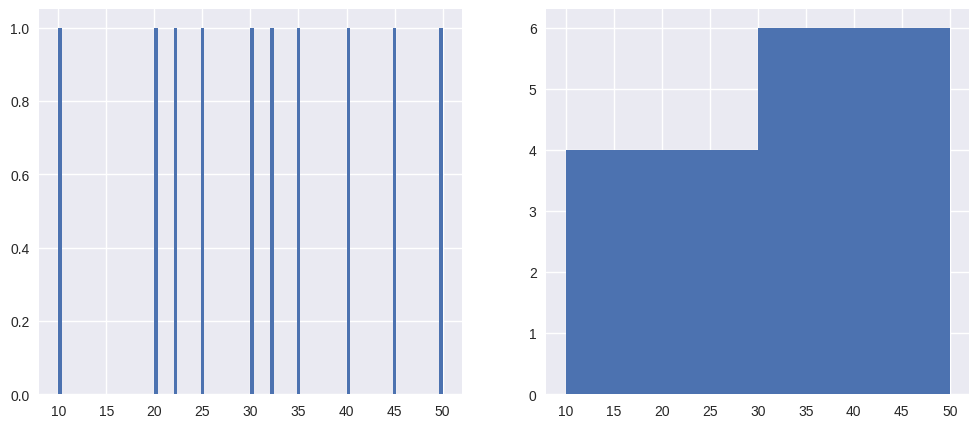

In [39]:
data = pd.Series([10, 20, 22, 25, 30, 32, 35, 40, 45, 50])

# 1개의 figure, 2개의 axes.
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
data.hist(bins=100, ax=ax[0])
data.hist(bins=2, ax=ax[1])

↓ 상자 그림(Box Plot)